# Superstores Analyses

![alt text](26252.jpg "Superstores")

**L'objectif de ce notebook est de prendre en main le dataset unifiant les informations issues de différents magasins en ligne aux Etats-Unis et d'effectuer des analyses afin d'extraire et de mettre en évidence des tendances business et les relations de cause à effet.**

## 1. Le dataset

In [1]:
#import chardet
#with open('superstore.csv', 'rb') as rawdata:
#    result = chardet.detect(rawdata.read(100000))
#result


# On importe les modules nécessaires
import numpy as np
import pandas as pd
import datatable as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# lecture du fichier csv et on l'applique à df
df = pd.read_csv('superstore.csv', sep=',', encoding="Windows-1252", index_col=0)
# Transformation des variables temporelles en type datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.drop(['Postal Code', 'Country'], axis=1) # On supprime ces variables car non pertinentes
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Region         9994 non-null   object        
 10  Product ID     9994 non-null   object        
 11  Category       9994 non-null   object        
 12  Sub-Category   9994 non-null   object        
 13  Product Name   9994 non-null   object        
 14  Sales          9994 non-null   float64       
 15  Quantity       9994 n

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
Row ID                                                                     
1       CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
3       CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
4       US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
5       US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

          Customer Name    Segment             City       State Region  \
Row ID                                                                   
1           Claire Gute   Consumer        Henderson    Kentucky  South   
2           Claire Gute   Consumer        Henderson    Kentucky  South   
3       Darrin Van Huff  Corporate      Los Angeles  California   West   
4        Sean O'Donnell   Consumer  Fort Lauderdale     Florida  South   
5        Sean O'Donnell   Consumer  Fort Lauderdale     Florida  South   

             Product ID         Category Sub-Category  \
Row ID                                                  
1       FUR-BO-10001798        Furniture    Bookcases   
2       FUR-CH-10000454        Furniture       Chairs   
3       OFF-LA-10000240  Office Supplies       Labels   
4       FUR-TA-10000577        Furniture       Tables   
5       OFF-ST-10000760  Office Supplies      Storage   

                                             Product Name     Sales  Quantity  \
Row ID                                                                          
1                       Bush Somerset Collection Bookcase  261.9600         2   
2       Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
3       Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
4           Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
5                          Eldon Fold 'N Roll Cart System   22.3680         2   

        Discount    Profit  
Row ID                      
1           0.00   41.9136  
2           0.00  219.5820  
3           0.00    6.8714  
4           0.45 -383.0310  
5           0.20    2.5164

Affichons les modalités de chaque variables :

In [2]:
print('Modalités uniques : ')
print('Order ID : ', df['Order ID'].nunique())
print('Ship Mode : ', df['Ship Mode'].unique())
print('Nombre de clients uniques : ', df['Customer Name'].nunique())
print('Segment : ', df['Segment'].unique())
print('City : ', df['City'].nunique())
print('State : ', df['State'].nunique())
#print('Postal Code : ', df['Postal Code'].nunique())
print('Region : ', df['Region'].unique())
print('Product ID : ', df['Product ID'].nunique())
print('Category : ', df['Category'].unique())
print('Sub-Category : ', df['Sub-Category'].unique())
print('Product Name : ', df['Product Name'].nunique())

Modalités uniques : 
Order ID :  5009
Ship Mode :  ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Nombre de clients uniques :  793
Segment :  ['Consumer' 'Corporate' 'Home Office']
City :  531
State :  49
Region :  ['South' 'West' 'Central' 'East']
Product ID :  1862
Category :  ['Furniture' 'Office Supplies' 'Technology']
Sub-Category :  ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Product Name :  1850


Ci-dessous on trace la distribution des variables quantitatives

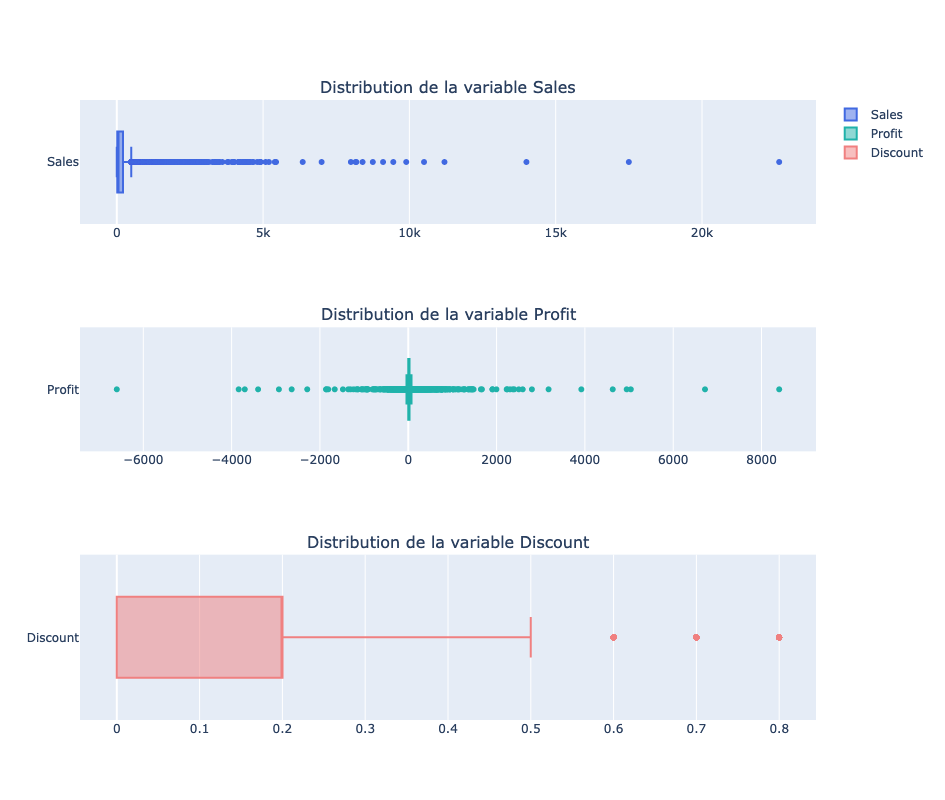

In [3]:
# Affichage de la distribution des variables numériques
fig = make_subplots(
    rows=3, cols=1,
    row_heights=[0.3, 0.3, 0.4],
    specs=[[{"type" : "box"}],
           [{"type" : "box"}],
           [{"type" : "box"}]],
    subplot_titles=("Distribution de la variable Sales", 
                    "Distribution de la variable Profit", 
                    "Distribution de la variable Discount"))
fig.add_trace(go.Box(x=df['Sales'], marker_color = 'royalblue', name='Sales'), 1, 1)
fig.add_trace(go.Box(x=df['Profit'], marker_color = 'lightseagreen', name='Profit'), 2, 1)
fig.add_trace(go.Box(x=df['Discount'], marker_color = 'lightcoral', name='Discount'), 3, 1)
fig.update_layout(height=800)
fig.show()

> Sales : cette variable a quelques valeurs extrêmes lorsqu'on dépasse 5k d'achats  
> Profit : le profit varie de -6k à 8k environ.  
> Discount : cette variable détient des valeurs comprises entre 0 et 80% de réduction. La médiane se situant à 20%.  

In [4]:
df = df.sort_values('Order Date')

# On scinde le dataset par année
df_2014 = df[df['Order Date'] <= '2014-12-31']
df_2014 = df_2014.groupby('Order Date').mean()
df_2015 = df[(df['Order Date'] >= '2015-01-01') & (df['Order Date'] <= '2015-12-31')]
df_2015 = df_2015.groupby('Order Date').mean()
df_2016 = df[(df['Order Date'] >= '2016-01-01') & (df['Order Date'] <= '2016-12-31')]
df_2016 = df_2016.groupby('Order Date').mean()
df_2017 = df[(df['Order Date'] >= '2017-01-01') & (df['Order Date'] <= '2017-12-31')]
df_2017 = df_2017.groupby('Order Date').mean()
df_2018 = df[(df['Order Date'] >= '2018-01-01') & (df['Order Date'] <= '2018-12-31')]
df_2018 = df_2018.groupby('Order Date').mean()

# Affichage de la plus grosse perte d'argent
#df[df['Order Date'] == '2015-01-28']

Après avoir fait la moyenne des ventes par jour, on affiche la variation de Sales et Profit sur le même graphique :

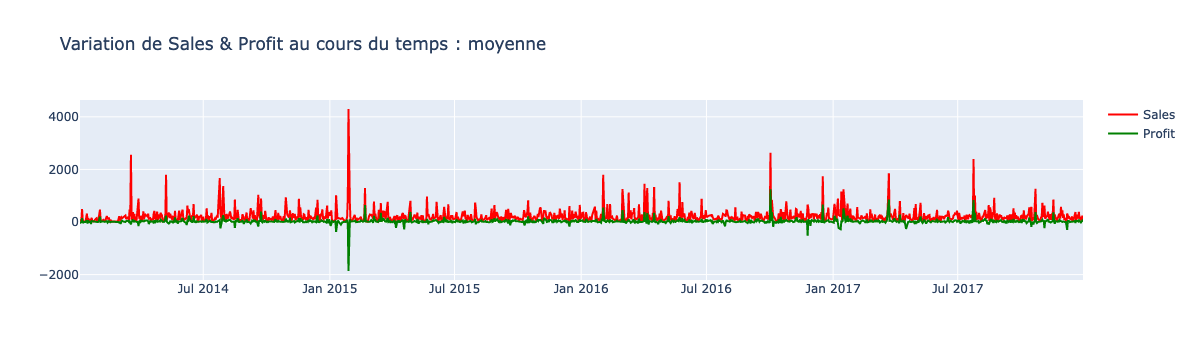

In [5]:
# On regroupe les ventes par jour, puis on trace sales et profit dans le temps
# mean
df_tot = df.groupby('Order Date').agg({'Sales':'mean', 'Profit':'mean'})
df_tot = df_tot.sort_values('Order Date', ascending=False)
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_tot.index, y = df_tot['Sales'], line = dict(color='red', width=2), name = 'Sales'))
fig.add_trace(go.Scatter(x = df_tot.index, y = df_tot['Profit'], line = dict(color='green', width=2), name = 'Profit'))
fig.update_traces(overwrite=True)
fig.update_layout(title = 'Variation de Sales & Profit au cours du temps : moyenne')
fig.show()

> On observe certaines valeurs extrêmes en termes de pertes. Il serait intéressant de découvrir pourquoi.

In [6]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df['Discount'][df.Profit < -1000], y=df['Profit'][df.Profit < -1000]))
fig.update_layout(barmode='stack', title_text='Profit vs Discount', xaxis_title='Discount', yaxis_title='Profit')
fig.show()

En effet, les plus grosses promotions induisent les plus grosses pertes de profit.

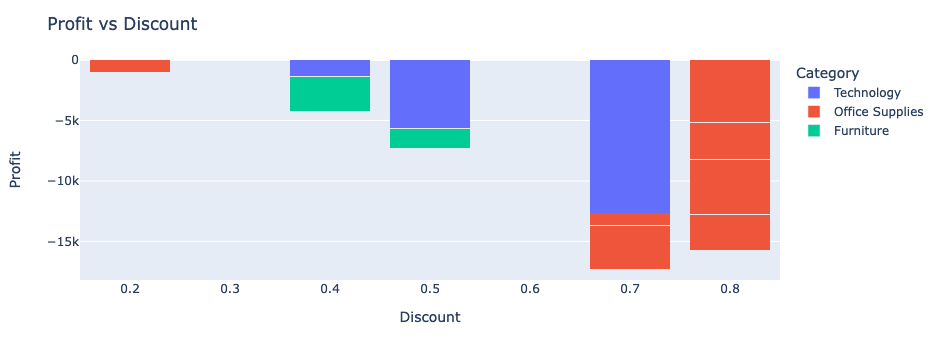

In [7]:
fig = px.bar(x=df['Discount'][df.Profit < -1000], y=df['Profit'][df.Profit < -1000], color=df['Category'][df.Profit < -1000])
fig.update_layout(barmode='stack', title_text='Profit vs Discount', xaxis_title='Discount', yaxis_title='Profit', legend_title='Category')
fig.show()

En affichant les pertes par catégorie, on remarque que les plus grosses pertes sont issues des ventes de fournitures de bureau.

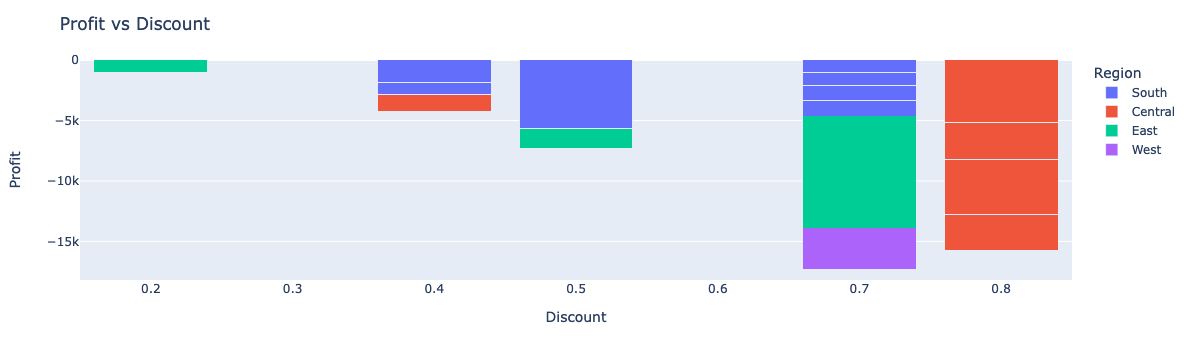

In [8]:
fig = px.bar(x=df['Discount'][df.Profit < -1000], y=df['Profit'][df.Profit < -1000], color=df['Region'][df.Profit < -1000])
fig.update_layout(barmode='stack', title_text='Profit vs Discount', xaxis_title='Discount', yaxis_title='Profit', legend_title='Region')
fig.show()
fig = px.bar(x=df['Category'][df.Profit < -1000], y=df['Profit'][df.Profit < -1000], color=df['Sub-Category'][df.Profit < -1000])
fig.update_layout(barmode='stack', title_text='Profit vs Category', xaxis_title='Category', yaxis_title='Profit', legend_title='Sub-Category')
fig.show()

Profit vs Discount :
> On voit que les pertes se concentrent sur la région centrale des Etats-Unis, ainsi que la région Est.  

Profit vs Category
> Ce graphique nous informe que ce sont les classeurs et machines qui constituent les plus grandes pertes.

On décide maintenant d'afficher la distribution des variables catégorielles :

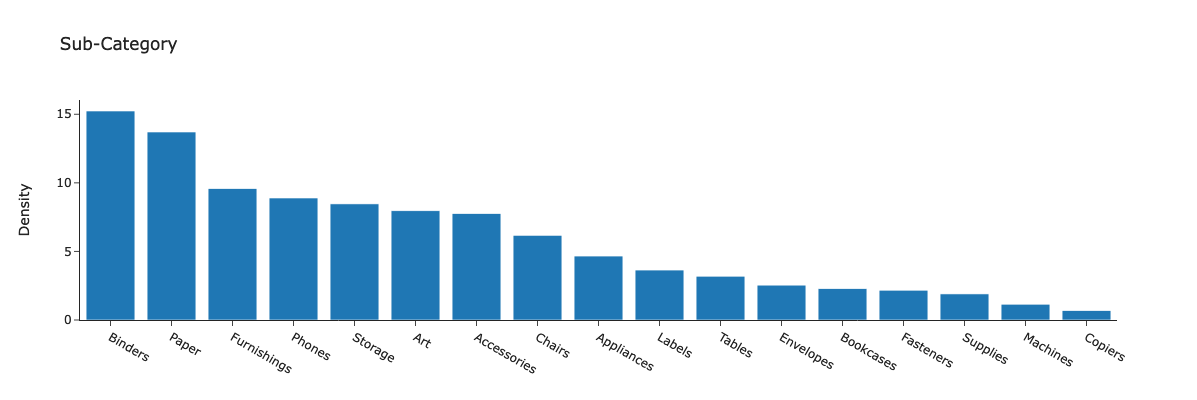

In [9]:
# subplots de la distribution de variables qualitatives
fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Histogram(x=df['Ship Mode'], name='Ship Mode', marker_color='darkblue', histnorm='percent'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Segment'], name='Segment', histnorm='percent'), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Category'], name='Category', histnorm='percent'), row=2, col=1)
fig.add_trace(go.Histogram(x=df['Region'], name='Region', histnorm='percent'), row=2, col=2)

fig.update_layout(title = 'Répartition des variables catégorielles',
                 yaxis_title = 'Density',
                 width = 1000, 
                 height = 600,
                 template='simple_white')
fig.show()
# distribution de la variable sub-category
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['Sub-Category'], name = 'Sub-Category', histnorm='percent', nbinsx=len(df['Sub-Category'].unique())))
fig.update_layout(title = 'Sub-Category',
                 yaxis_title = 'Density',
                 width = 1000, 
                 height = 400,
                 template='simple_white',
                 xaxis={'categoryorder':'total descending'})
fig.show()

Traçons maintenant la relation entre les ventes et les profits selon les catégories :

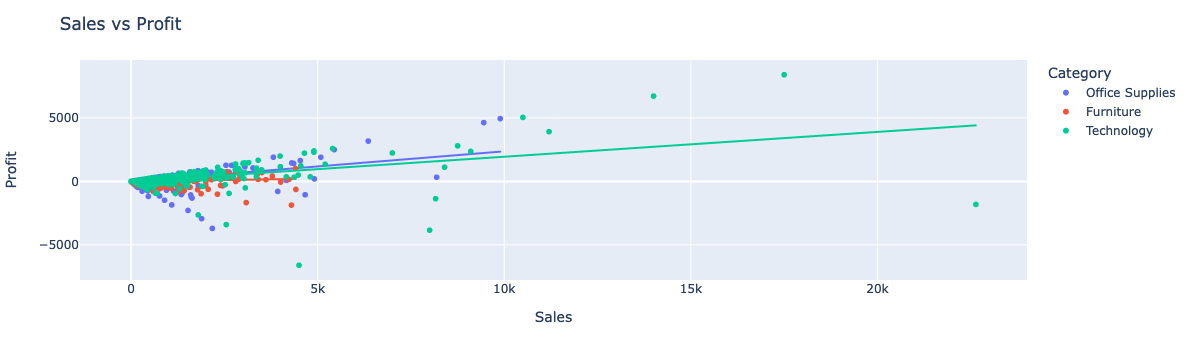

In [10]:
# scatter plot de sales et profit
fig = go.Figure()
fig = px.scatter(x=df.Sales, y=df.Profit, trendline='ols', color=df.Category)
fig.update_layout(title='Sales vs Profit', yaxis_title='Profit', xaxis_title='Sales', legend_title='Category')
fig.show()

La catégorie de produits technologiques offre les profits les plus importants.

## Scatter Geo

Après avoir récolter les données géographiques de chaque ville, on les intègre au dataframe afin d'obtenir les latitudes et longitudes pour chaque ville

In [11]:
gf = pd.read_csv('uscities.csv', index_col='id')
gf = gf.drop(gf.loc[gf['state_name'] == 'Hawaii'].index.to_list())
gf = gf.drop(gf.loc[gf['state_name'] == 'Alaska'].index.to_list())
gf = gf.drop(gf.loc[gf['state_name'] == 'Puerto Rico'].index.to_list())
gf = gf.drop(gf.loc[gf['city'] == 'New Hempstead'].index.to_list())
gf = gf.drop(gf.loc[gf['city'] == 'West Hempstead'].index.to_list())
gf = gf[['city', 'state_name', 'lat', 'lng']]

gf['city'].loc[gf['city'] == 'New York'] = 'New York City'
gf['city'].loc[gf['city'] == 'Fairfield University'] = 'Fairfield'
gf['city'].loc[gf['city'] == 'East Orange'] = 'Orange'
gf['city'].loc[gf['city'] == 'South Hempstead'] = 'Hempstead'
gf['city'].loc[gf['city'] == 'McAllen'] = 'Mcallen'
gf['city'].loc[gf['city'] == 'Milford city'] = 'Milford'
gf.loc[1840002792, 'city'] = 'East Orange'

city_list = []
for city in gf['city']:
    if 'St.' in city:
        city_list.append(city.replace('St.', 'Saint'))
    else:
        city_list.append(city)  
gf['city'] = city_list

gf.info()
gf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29638 entries, 1840034016 to 1840008313
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        29638 non-null  object 
 1   state_name  29638 non-null  object 
 2   lat         29638 non-null  float64
 3   lng         29638 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.1+ MB


city  state_name      lat       lng
id                                                      
1840034016  New York City    New York  40.6943  -73.9249
1840020491    Los Angeles  California  34.1141 -118.4068
1840000494        Chicago    Illinois  41.8375  -87.6866
1840015149          Miami     Florida  25.7840  -80.2101
1840019440         Dallas       Texas  32.7935  -96.7667

On les intègre maintenant à notre dataframe global, en faisant attention aux doublons ou différences orthographiques.

In [12]:
# Création du dictionnaire avec pour chaque ville la latitude et la longitude
import time
start = time.time()
d = dict()
for i in range(gf.shape[0]):
    if gf['state_name'].iloc[i] not in d:
        d[gf['state_name'].iloc[i]] = dict()
    d[gf['state_name'].iloc[i]].update({gf['city'].iloc[i] : (gf['lat'].iloc[i], gf['lng'].iloc[i])})

end = time.time()
d['New Jersey'].update({'Belleville' : (43.7893, -76.1153)})
d['New Jersey'].update({'Lakewood' : (42.0992, -79.3201)})
d['Connecticut'].update({'Manchester' : (41.780434, -72.541466)})
d['Massachusetts'].update({'Franklin' : (42.0834, -71.3967)})
d['Michigan'].update({'Canton' : (42.308644, -83.482116)})
d['New Jersey'].update({'Bridgeton' : (39.429564, -75.230461)})
d['Connecticut'].update({'Milford' : (41.230698, -73.064034)})
d['Massachusetts'].update({'Andover' : (42.658336, -71.136795)}) 
d['New Jersey'].update({'Orange' : (40.7651, -74.2117)}) 

lat = []
lng = []
for n in range(df.shape[0]):
    lat.append(d[df['State'].iloc[n]][df['City'].iloc[n]][0])
    lng.append(d[df['State'].iloc[n]][df['City'].iloc[n]][1])

df['lat'] = lat
df['lng'] = lng
print(f'performed in : {end-start} seconds')

performed in : 2.8158538341522217 seconds


In [13]:
lt = []
ln = []
ml = pd.DataFrame(df.groupby(['State', 'City']).mean())

for n in range(ml.shape[0]):
    lt.append(d[ml.index[n][0]][ml.index[n][1]][0])
    ln.append(d[ml.index[n][0]][ml.index[n][1]][1])

ml['lat'] = lt
ml['lng'] = ln
print(ml.info())
ml.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 604 entries, ('Alabama', 'Auburn') to ('Wyoming', 'Cheyenne')
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     604 non-null    float64
 1   Quantity  604 non-null    float64
 2   Discount  604 non-null    float64
 3   Profit    604 non-null    float64
 4   lat       604 non-null    float64
 5   lng       604 non-null    float64
dtypes: float64(6)
memory usage: 34.7+ KB
None


Sales  Quantity  Discount      Profit      lat  \
State   City                                                              
Alabama Auburn      294.471667  2.666667       0.0   75.434517  32.6087   
        Decatur     259.601538  4.000000       0.0   76.929854  34.5731   
        Florence    399.470000  4.800000       0.0   49.731780  34.8303   
        Hoover      131.462500  3.750000       0.0    4.679325  33.3763   
        Huntsville  248.437000  4.000000       0.0  100.525720  34.6981   

                        lng  
State   City                 
Alabama Auburn     -85.4903  
        Decatur    -86.9905  
        Florence   -87.6655  
        Hoover     -86.8068  
        Huntsville -86.6412

In [14]:
cities = [ml.index[i][1] for i in range(ml.shape[0])] # permet d'avoir une liste contenant le nom des villes

**Scatter Geo** nous permet d'afficher pour chaque ville, les variables qu'on souhaite, sous forme de bulles dont la taille est définie par la variable choisie.

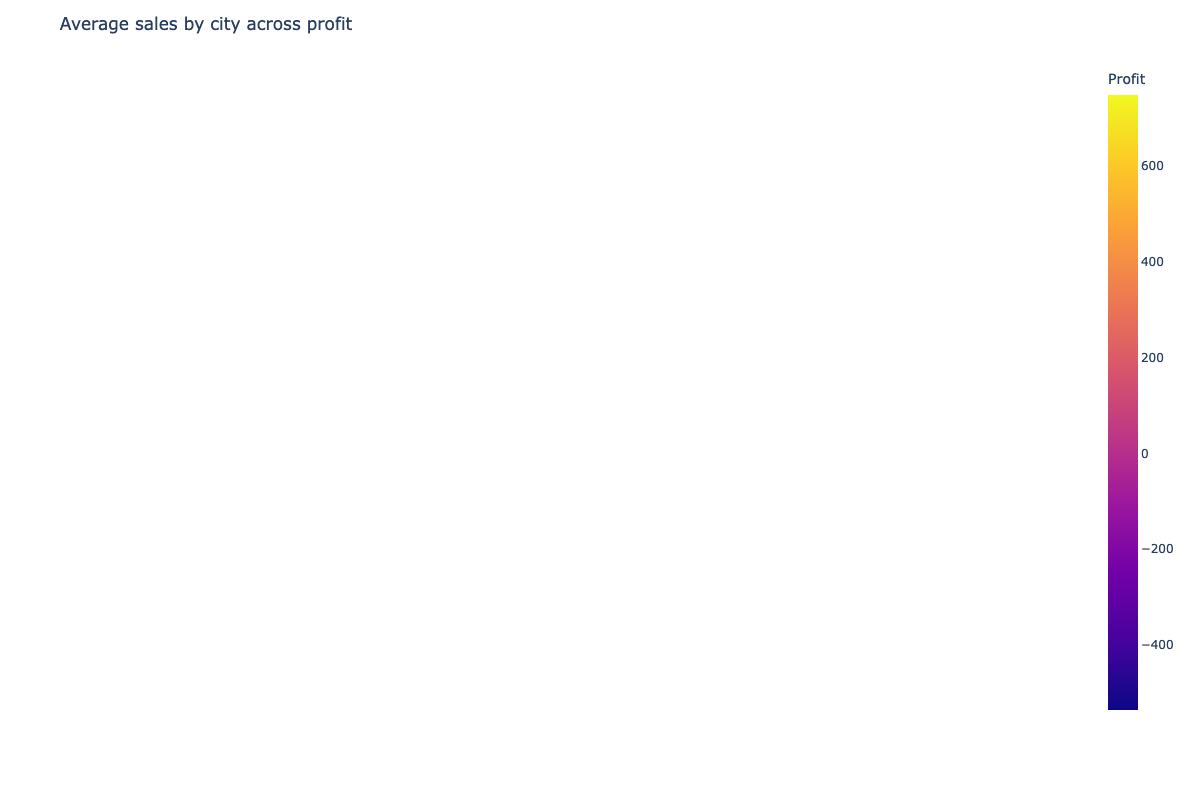

In [15]:
fig = px.scatter_geo(
    ml,
    lat=ml['lat'],
    lon=ml['lng'],
    size = ml['Sales'],
    hover_name = cities,
    color = ml['Profit'],
    width=1000,
    height=800
)

fig.update_layout(
        title = 'Average sales by city across profit',
        geo_scope ='usa',
    )
fig.show()

On distingue bien les villes qui obtiennent les meilleurs profits, telles que : Jamestown, Lafayette, Independance...

# Analyse statistique

On peut en premier lieu, utiliser le test de _Pearson_, qui nous informe sur la corrélation entre variables quantitatives :

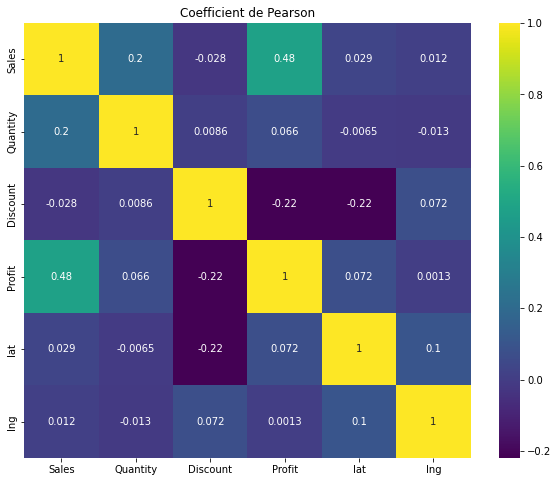

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap='viridis');
plt.title('Coefficient de Pearson');

> Il existe aussi le test _ANOVA_, qui permet de déterminer la corrélation entre variables numériques et catégorielles.

In [17]:
import statsmodels.api
result = statsmodels.formula.api.ols('Profit ~ Category', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
print('ANOVA TEST : Profit vs Category')
table

ANOVA TEST : Profit vs Category


df        sum_sq       mean_sq          F        PR(>F)
Category     2.0  5.898009e+06  2.949004e+06  54.311023  3.469918e-24
Residual  9991.0  5.424958e+08  5.429845e+04        NaN           NaN

Le test ANOVA calcule 2 valeurs importantes : La statistique F et la p-value. Plus F est élevée moins les variables sont corrélées. Inversement proportionnelle avec la p-value.

Enfin, le test du Chi 2 permet d'analyser les variables catégorielles et mettre en évidence leur corrélation.

In [18]:
from scipy.stats import chi2_contingency
df_cat = df.select_dtypes('object')
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi_2 = max(0,(stat_chi2)/N - ((k - 1)*(r - 1)/(N - 1)))
    k_b = k - (np.square(k - 1) / (N - 1))
    r_b = r - (np.square(r - 1) / (N - 1))   
    return np.sqrt(phi_2 / min(k_b - 1, r_b - 1))


dico = {}
for col in df_cat.columns[df_cat.columns != 'Sales']:
    table = pd.crosstab(df_cat[col], df['Sales'])
    res = chi2_contingency(table)
    dico[col] = [res[0], res[1], res[2], V_Cramer(table, df.shape[0])]
    
    
stats = pd.DataFrame.from_dict(dico).transpose()
stats = stats.rename(columns={0:'$\chi 2$', 1:'p-value', 2:'DoF', 3:'V de Cramer'})
stats

$\chi 2$        p-value         DoF  V de Cramer
Order ID       2.924987e+07   6.178620e-28  29166592.0     0.057527
Ship Mode      1.732136e+04   7.894698e-01     17472.0     0.000000
Customer ID    4.639018e+06   1.995855e-18   4612608.0     0.059670
Customer Name  4.639018e+06   1.995855e-18   4612608.0     0.059670
Segment        1.166139e+04   4.633326e-01     11648.0     0.024730
City           3.057811e+06   1.000000e+00   3086720.0     0.000000
State          2.788065e+05   8.406332e-01    279552.0     0.000000
Region         1.827125e+04   1.245468e-05     17472.0     0.163117
Product ID     1.303677e+07   0.000000e+00  10838464.0     0.381016
Category       1.780459e+04  2.281732e-266     11648.0     0.554994
Sub-Category   1.326616e+05   0.000000e+00     93184.0     0.497213
Product Name   1.300399e+07   0.000000e+00  10768576.0     0.385182

# Machine Learning

In [3]:
'''
df_new = df.copy() # On enregistre df dans df_new pour ne pas corrompre les données de df
df_new = df_new.drop(['Order ID', 'Country'], axis=1)

targets = df['Sales']
targetp = df['Profit']
data = df_new.drop(['Sales', 'Profit'], axis=1)

# On crée des variables indicatrices à partir des variables catégorielles
data = data.join(pd.get_dummies(data['Ship Mode'], prefix='ship'))
data = data.join(pd.get_dummies(data['Segment'], prefix='seg'))
data = data.join(pd.get_dummies(data['Region'], prefix='reg'))
data = data.join(pd.get_dummies(data['Category'], prefix='cat'))
data = data.join(pd.get_dummies(data['Sub-Category'], prefix='s-c'))
  
# On supprimes les variables dont on a plus besoin
data = data.drop(['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category',
                  'Customer Name', 'City', 'State', 'Product Name', 'Order Date', 'Ship Date', 'Customer ID', 'Product ID'], axis=1)
print(data.columns)
data.head()
'''

"\ndf_new = df.copy() # On enregistre df dans df_new pour ne pas corrompre les données de df\ndf_new = df_new.drop(['Order ID', 'Country'], axis=1)\n\ntargets = df['Sales']\ntargetp = df['Profit']\ndata = df_new.drop(['Sales', 'Profit'], axis=1)\n\n# On crée des variables indicatrices à partir des variables catégorielles\ndata = data.join(pd.get_dummies(data['Ship Mode'], prefix='ship'))\ndata = data.join(pd.get_dummies(data['Segment'], prefix='seg'))\ndata = data.join(pd.get_dummies(data['Region'], prefix='reg'))\ndata = data.join(pd.get_dummies(data['Category'], prefix='cat'))\ndata = data.join(pd.get_dummies(data['Sub-Category'], prefix='s-c'))\n  \n# On supprimes les variables dont on a plus besoin\ndata = data.drop(['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category',\n                  'Customer Name', 'City', 'State', 'Product Name', 'Order Date', 'Ship Date', 'Customer ID', 'Product ID'], axis=1)\nprint(data.columns)\ndata.head()\n"

In [ ]:
'''
# TEST DES MODELE EN STANDARDISANT LES VARIABLES NUMERIQUES
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# on split nos données
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

# on crée 2 modèles
gbc = GradientBoostingClassifier(n_estimators = 200,
                                  learning_rate=0.1,
                                  max_depth = 6,
                                  random_state = 234)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=234)

# on entraine les modèles
gbc.fit(X_train, y_train)
dt.fit(X_train, y_train)

# on prédit les résultat
y_pred_gbc = gbc.predict(X_test)
y_pred_dt = dt.predict(X_test)

print('gradient boosting accuracy train score : ',metrics.accuracy_score(y_train, gbc.predict(X_train)).round(2))
print('gradient boosting accuracy test score : ',metrics.accuracy_score(y_test, y_pred_gbc).round(2))
print('decision tree accuracy train score : ',metrics.accuracy_score(y_train, dt.predict(X_train)).round(2))
print('decision tree accuracy test score : ',metrics.accuracy_score(y_test, y_pred_dt).round(2))
print('gradient boosting score : ',gbc.score(X_test, y_test).round(2))
print('decision tree score : ',dt.score(X_test, y_test).round(2))
'''

'''
fig = go.Figure()
fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = ml['lng'],
        lat = ml['lat'],
        text = cities,
        marker = dict(
            size = ml['Sales']/4,
            color = ml['Profit'],
            line_color='rgb(20,40,60)',
            line_width=0.5,
            sizemode = 'area'
        )
))
fig.update_layout(
        title = 'Répartition des ventes par ville',
        geo_scope ='usa',
    width=900, height=700
    )
fig.show()
'''

In [22]:
from importlib_metadata import version
print(version('plotly'))

5.7.0
